## Red Wine Quality Final Project - Background
In this project, a dataset related to red wine samples from the northwest region of Portugal will
be analyzed. The quality of a red wine that is determined via a sensory test is dependent on many different
physicochemical properties, namely, fixed acidity, volatile acidity, pH value, density, etc. A file named
‘winequality-red.csv’ contains information about different varieties of red wine and their quality that
depends on several physicochemical properties like the ones mentioned above. Specifically, in the dataset, there is a quality score (QS) ranging from 3 to 8 that is given to each variety of red wine depending on 11 different properties. For this project, consider that a good wine is one with a quality score of
QS ≥ 6 and a bad wine is one with a quality score of QS ≤ 5. The objective of this problem is to
classify whether the wine is good or bad depending on the 11 different properties that are in the dataset.


**Database Acquisition**
- Get the database from the zip file from BlackBoard or Kaggle website: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
- Supply links to any additional databases discovered during the literature research

**Exploratory Data Analysis**
- Describe (in words) the database.
- Reformat as needed (column headings perhaps) the database for subsequent analysis.

**Model Building**
- Build data model
- Assess data model quality
- Build the input data interface for using the model              
       
**Documentation**
- Training and Project management video on how to use your tool, and demonstrate the tool(s) as they are run
- Interim report (see deliverables below); this document must be rendered as a .pdf, but you are free to use your favorite writing software (Word,LibreOffice, ...).
- Final ipynb file (see deliverables below)

**Exploratory Data Analysis of Red Wine Quality**


The database for Red Wine Quality is divided into 11 columns for fixed acidity, volatile acidity, citric acid, residual sugar,chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol. All 11 properties listed determine the 12th column, the quality. The quality of wine is determined on a scale of 3 to 8, where any quality score greater than or equal to 6 is considered good wine.

In [50]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [51]:
red_wine = pd.read_csv("redwinequality.csv")
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [52]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [53]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [54]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [55]:
x_standard = red_wine['quality']
y_standard = red_wine['alcohol']

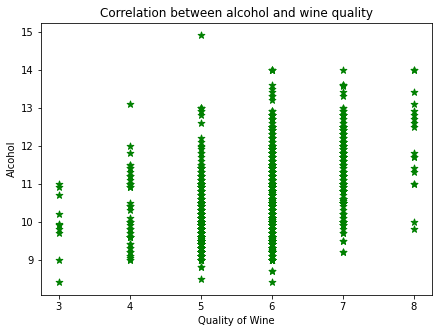

In [56]:
plt.figure(figsize=(7,5))
plt.scatter(x_standard, y_standard, s=50, marker='*',color = 'green')
plt.xlabel("Quality of Wine")
plt.ylabel("Alcohol")
plt.title("Correlation between alcohol and wine quality")
plt.show()

In [57]:
red_wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [58]:
x_standard = red_wine['fixed acidity']
y_standard = red_wine['pH']

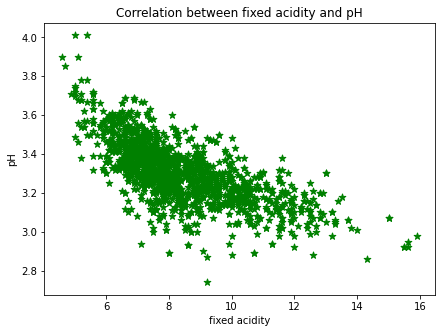

In [59]:
plt.figure(figsize=(7,5))
plt.scatter(x_standard, y_standard, s=50, marker='*',color = 'green')
plt.xlabel("fixed acidity")
plt.ylabel("pH")
plt.title("Correlation between fixed acidity and pH")
plt.show()

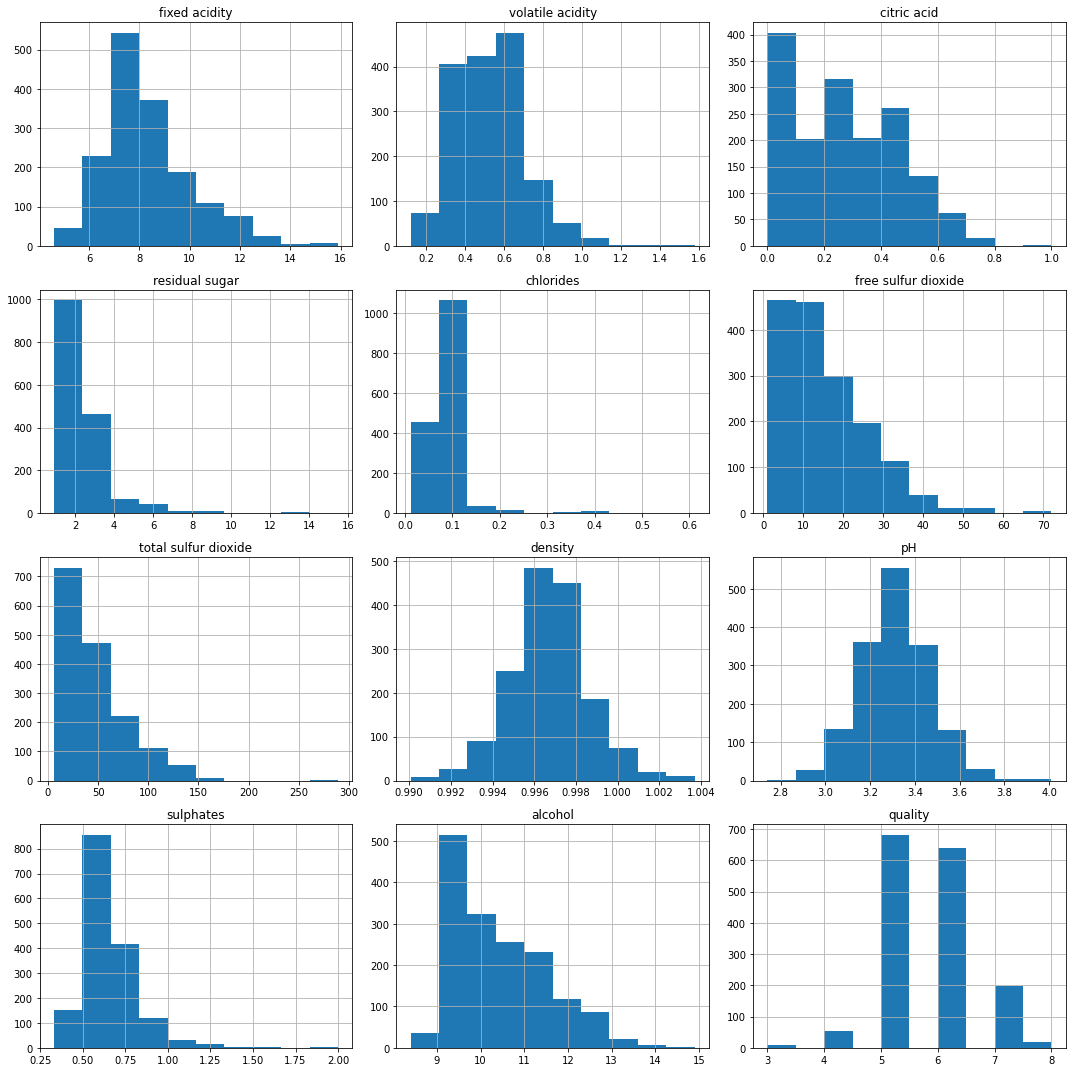

In [60]:
red_wine.hist(figsize=(15,15)) 
plt.tight_layout()
plt.show()

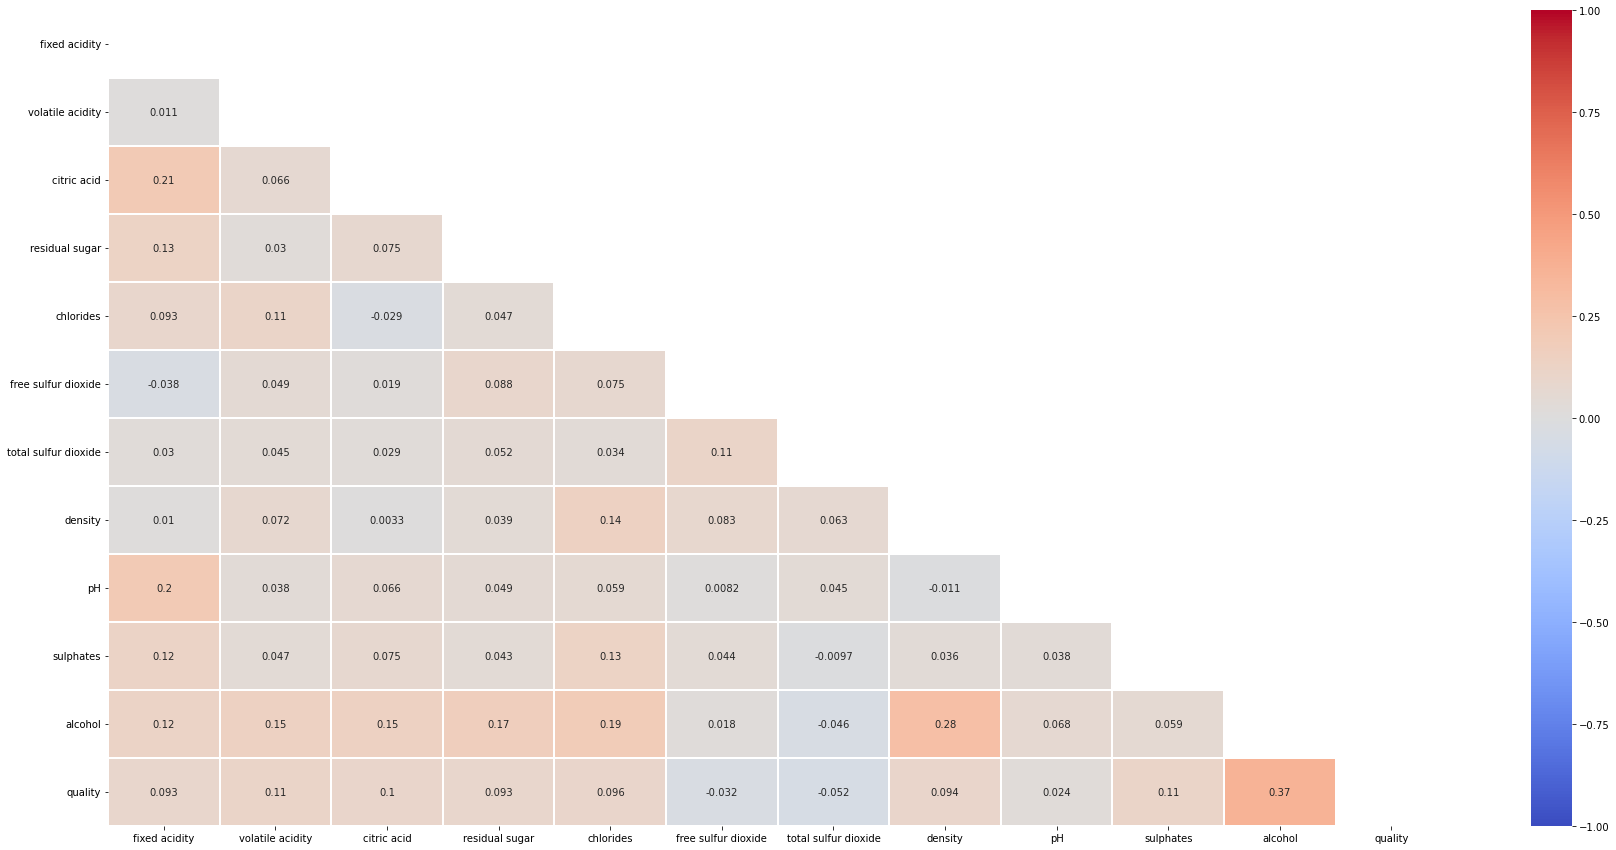

In [61]:
plt.figure(5, figsize=(30, 15))
corr = red_wine.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

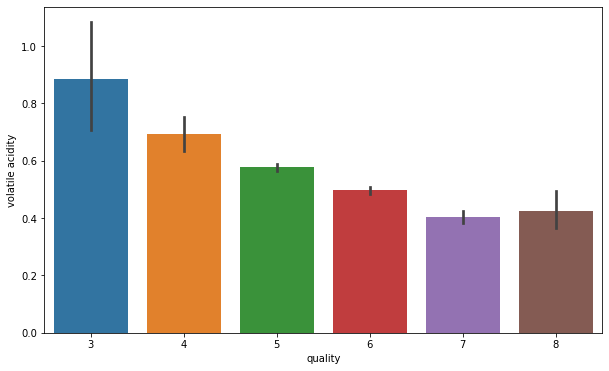

In [62]:
plt.figure(figsize=(10,6))
sns.barplot(x= 'quality',y= 'volatile acidity', data = red_wine)
#as quality increases, the volatile acidity decreases

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

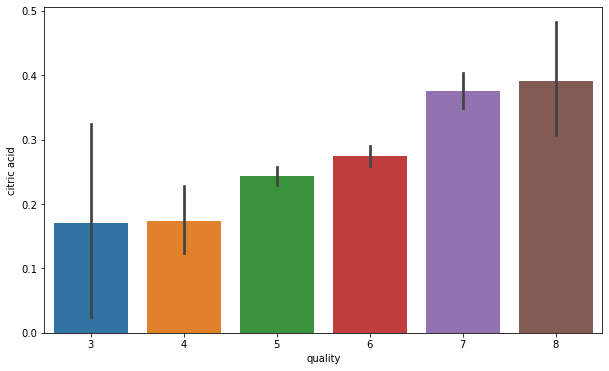

In [63]:
plt.figure(figsize=(10,6))
sns.barplot(x= 'quality',y= 'citric acid', data = red_wine)
#quality increases as citric acid increases

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

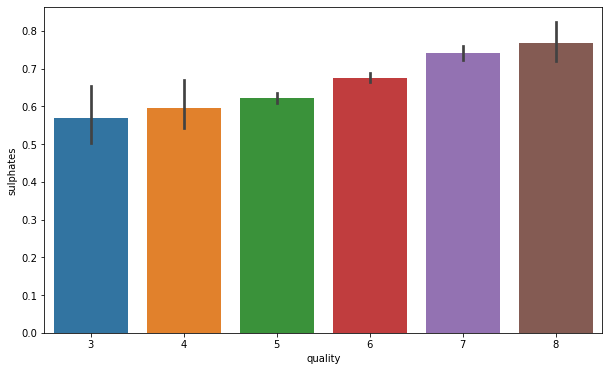

In [64]:
plt.figure(figsize=(10,6))
sns.barplot(x= 'quality',y= 'sulphates', data = red_wine)
#quality increases as sulphates increases

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

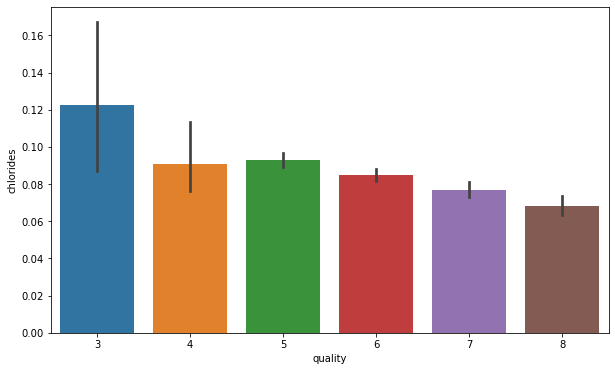

In [65]:
plt.figure(figsize=(10,6))
sns.barplot(x= 'quality',y= 'chlorides', data = red_wine)
#quality increases as sulphates increases

In [66]:
red_wine.corr()['quality'].sort_values(ascending=False)[1:]

alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

## Preparing the Data for Modeling

In [67]:
red_wine.columns = red_wine.columns.str.replace(' ', '_')

In [68]:
red_wine.isnull().sum()
#finding any missing values, there are none

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [69]:
red_wine.duplicated().sum()
#Finding the sum of the duplicated values

240

In [70]:
red_wine[red_wine.duplicated()]
#A table of the duplicated values 

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [71]:
red_wine.drop_duplicates(inplace=True)
#Dropping the duplicated values from the data set

In [72]:
red_wine.shape
#New shape after dropping the duplicated values

(1359, 12)

In [73]:
red_wine.describe(percentiles=[0.01, .1, .25,.5,.75, .9,.95, .96, .97, .98, .99]).T


,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
fixed_acidity,1359.0,8.310596,1.736990,4.60000,5.200000,6.500000,7.1000,7.9000,9.20000,10.7000,11.7100,11.968000,12.326000,12.60000,13.24200,15.90000
volatile_acidity,1359.0,0.529478,0.183031,0.12000,0.200000,0.310000,0.3900,0.5200,0.64000,0.7600,0.8505,0.880000,0.910000,0.96500,1.02920,1.58000
citric_acid,1359.0,0.272333,0.195537,0.00000,0.000000,0.010000,0.0900,0.2600,0.43000,0.5300,0.6000,0.636800,0.660000,0.68000,0.70420,1.00000
residual_sugar,1359.0,2.523400,1.352314,0.90000,1.400000,1.700000,1.9000,2.2000,2.60000,3.4600,4.8000,5.500000,6.000000,6.59200,8.30000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.042000,0.060000,0.0700,0.0790,0.09100,0.1100,0.1376,0.163720,0.180080,0.23584,0.36842,0.61100
free_sulfur_dioxide,1359.0,15.893304,10.447270,1.00000,3.000000,5.000000,7.0000,14.0000,21.00000,31.0000,35.0000,37.000000,39.000000,42.00000,50.00000,72.00000
total_sulfur_dioxide,1359.0,46.825975,33.408946,6.00000,8.000000,14.000000,22.0000,38.0000,63.00000,94.0000,113.0000,120.000000,127.000000,135.84000,145.84000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.991872,0.994472,0.9956,0.9967,0.99782,0.9991,0.9998,1.000084,1.000243,1.00060,1.00140,1.00369
pH,1359.0,3.309787,0.155036,2.74000,2.940000,3.120000,3.2100,3.3100,3.40000,3.5100,3.5700,3.580000,3.600000,3.63000,3.70420,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.430000,0.500000,0.5500,0.6200,0.73000,0.8500,0.9400,0.996800,1.060000,1.13840,1.28000,2.00000


In [74]:
def outlier_capping(x):
    x = x.clip(upper = x.mean()+ 3 * x.std())
    x = x.clip(lower = x.mean() - 3 * x.std())
    return x
#Capping the outliers that were present in the data above

In [75]:
data1 = red_wine.apply(outlier_capping)

<AxesSubplot:>

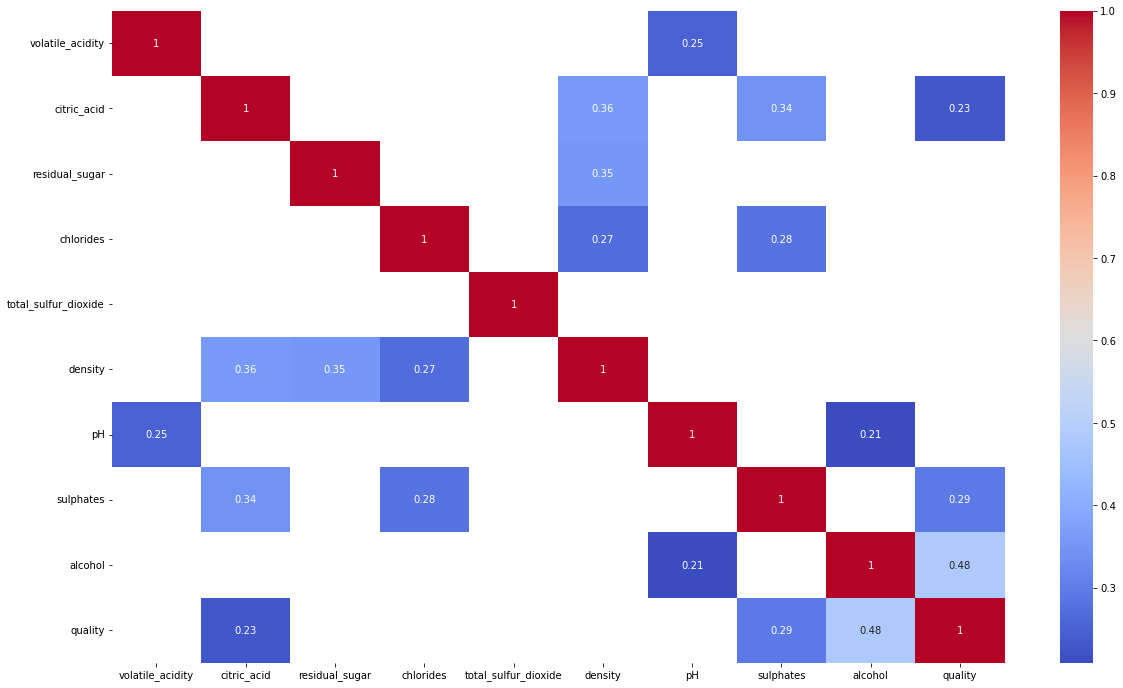

In [43]:
correlation = data1.corr()
filter_corr = correlation[correlation > 0.2]
#filtering values above 0.2
plt.figure(figsize = (20, 12))
#plotting the matrix
sns.heatmap(filter_corr, cmap = 'coolwarm', annot = True)

In [76]:
data1.drop(columns=['free_sulfur_dioxide','fixed_acidity'],inplace=True)

In [77]:
data1['quality'] = np.where(data1['quality'] < 6, 0, 1)
#Setting a cut off on wine quality

In [78]:
data1.head()

,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,0
1,0.88,0.00,2.6,0.098,67.0,0.9968,3.20,0.68,9.8,0
2,0.76,0.04,2.3,0.092,54.0,0.9970,3.26,0.65,9.8,0
3,0.28,0.56,1.9,0.075,60.0,0.9980,3.16,0.58,9.8,1
5,0.66,0.00,1.8,0.075,40.0,0.9978,3.51,0.56,9.4,0


## Building the Model

In [79]:
X = data1.drop(columns=["quality"])
y = data1["quality"]

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=70)
#Making our testing and training variables

In [81]:
log0 = LogisticRegression(max_iter = 1000)

In [82]:
log0.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [83]:
print("Train Accuracy", log0.score(X_train, y_train))

Train Accuracy 0.7470101195952162


In [84]:
print("Test Accuracy", log0.score(X_test, y_test))

Test Accuracy 0.7352941176470589


In [85]:
train_pred = log0.predict(X_train)
#Making this variable to predict based on the training data

In [86]:
metrics.confusion_matrix(y_train, train_pred)

array([[399, 124],
       [151, 413]], dtype=int64)

In [87]:
print(metrics.classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74       523
           1       0.77      0.73      0.75       564

    accuracy                           0.75      1087
   macro avg       0.75      0.75      0.75      1087
weighted avg       0.75      0.75      0.75      1087



In [89]:
test_pred = log0.predict(X_test)
#Our first prediction based on the testing data

In [90]:
print(metrics.classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71       117
           1       0.79      0.72      0.76       155

    accuracy                           0.74       272
   macro avg       0.73      0.74      0.73       272
weighted avg       0.74      0.74      0.74       272



In [1]:
#The scores above show the accuracy of the model as well as 
#some other measures of the model